## Paula: Hadley cell, shift of ITCZ

In [4]:
# Import the tools we are going to need today:
import matplotlib.pyplot as plt  # plotting library
import numpy as np  # numerical library
import xarray as xr  # netCDF library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
# Some defaults:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

ITCZ: low pressure over area (1 month delayed), where sun is in zenith (June: N, December: S, March, September: equator) -> highest warming rate -> rising air (incl cloud covering and precipitaion)
surface: at ITCZ point of convergence of trade winds (esterly deviaton due to Coriolis force)
-> Hadley cell

while ITCZ remains over equator: over land shift father N or S (until 45°)
heat retention and stability of temp within ocean ITCZ remains more anchored to 1 position over oceans
land temp vary over year (influenced by altitude and relief) -> greater ITCZ migration, climate variation over continents
offshore winds --> deep lows over land -> enormous seasonal rains

(http://thebritishgeographer.weebly.com/the-climate-of-tropical-regions.html)

## Sea level pressure and surface wind

ITCZ: low pressure over area (1 month delayed), where sun is in zenith (June: N, December: S, March, September: equator) 
surface: at ITCZ point of convergence of trade winds (esterly deviaton due to Coriolis force)
-> Hadley cell

while ITCZ remains over equator: over land shift father N or S (until 45°)
heat retention and stability of temp within ocean ITCZ remains more anchored to 1 position over oceans
land temp vary over year (influenced by altitude and relief) -> greater ITCZ migration, climate variation over continents
offshore winds --> deep lows over land -> enormous seasonal rains

(http://thebritishgeographer.weebly.com/the-climate-of-tropical-regions.html)

In [120]:
ds = xr.open_dataset('~/Python/Uni_climate/Lesson 2/ERA5_LowRes_MonthlyAvg_uvslp.nc')


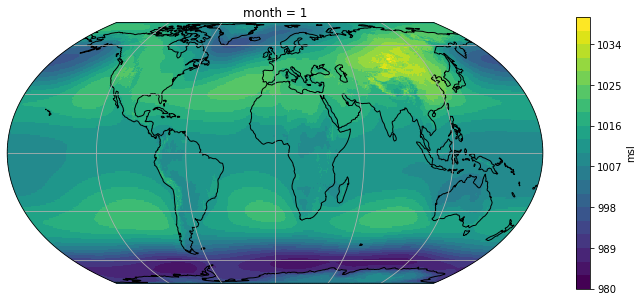

In [112]:
msl_avg = ds.msl.sel(month = 1) / 100
ax = plt.axes(projection=ccrs.EqualEarth())
msl_avg.plot(ax=ax, transform=ccrs.PlateCarree(), levels = np.linspace(980,1040,21))
ax.coastlines(); ax.gridlines();

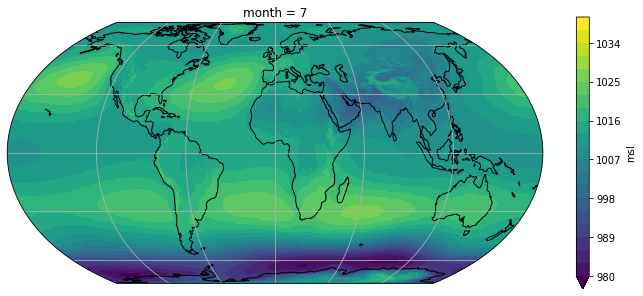

In [113]:
msl_avg = ds.msl.sel(month = 7) / 100
ax = plt.axes(projection=ccrs.EqualEarth())
msl_avg.plot(ax=ax, transform=ccrs.PlateCarree(), levels = np.linspace(980,1040,21))
ax.coastlines(); ax.gridlines();

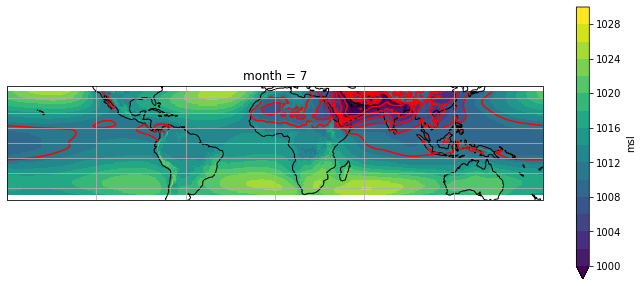

In [114]:
msl_avg = ds.msl.sel(month = 7).sel(latitude=slice(35, -35)) / 100
ax = plt.axes(projection=ccrs.PlateCarree())
msl_avg.plot(ax=ax, transform=ccrs.PlateCarree(), levels = np.linspace(1000,1030,16))
msl_avg.where(msl_avg < 1012).plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors = 'red')
ax.coastlines(); ax.gridlines(); #ax.gridlabels()

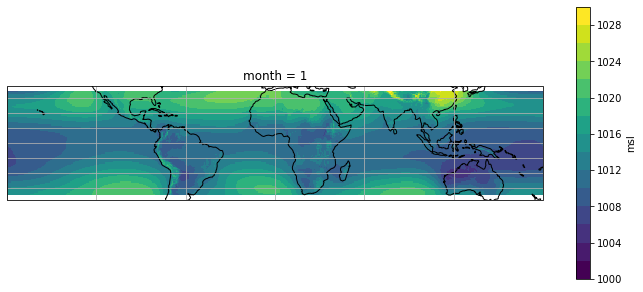

In [115]:
msl_avg = ds.msl.sel(month = 1).sel(latitude=slice(35, -35)) / 100
ax = plt.axes(projection=ccrs.PlateCarree())
msl_avg.plot(ax=ax, transform=ccrs.PlateCarree(), levels = np.linspace(1000,1030,16))
msl_avg.where(np.isclose(msl_avg, 1014)).plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors = 'red')
ax.coastlines(); ax.gridlines(); #ax.gridlabel()

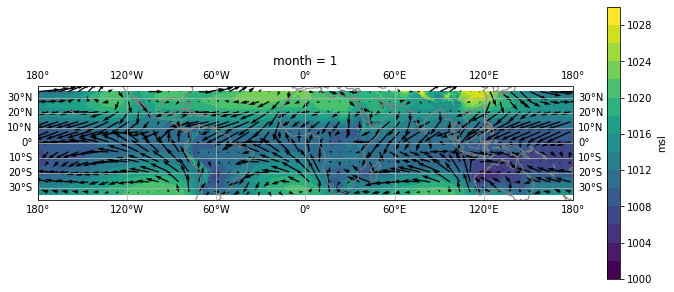

In [119]:
u = ds.u10.sel(month=1).sel(latitude=slice(35, -35)).load()
v = ds.v10.sel(month=1).sel(latitude=slice(35, -35)).load()

msl_avg = ds.msl.sel(month = 1).sel(latitude=slice(35, -35)) / 100
ax = plt.axes(projection=ccrs.PlateCarree())
msl_avg.plot(ax=ax, transform=ccrs.PlateCarree(), levels = np.linspace(1000,1030,16))
msl_avg.where(np.isclose(msl_avg, 1014)).plot.contour(ax=ax, transform=ccrs.PlateCarree(), colors = 'red')
#ax.coastlines(); ax.gridlines(); #ax.gridlabel()

#ax = plt.axes(projection=ccrs.PlateCarree())  # note that I changed the map projection
pu, pv = u[::9,::9], v[::9,::9]  # we will discuss what this line does in the cells below
qv = ax.quiver(pu.longitude, pu.latitude, pu, pv, transform=ccrs.PlateCarree())
ax.coastlines(color='grey');  ax.gridlines(draw_labels=True);

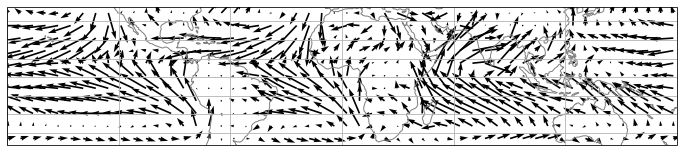

In [117]:
u = ds.u10.sel(month=7).sel(latitude=slice(35, -35)).load()
v = ds.v10.sel(month=7).sel(latitude=slice(35, -35)).load()

ax = plt.axes(projection=ccrs.PlateCarree())  # note that I changed the map projection
pu, pv = u[::9,::9], v[::9,::9]  # we will discuss what this line does in the cells below
qv = ax.quiver(pu.longitude, pu.latitude, pu, pv, transform=ccrs.PlateCarree())
ax.coastlines(color='grey');  ax.gridlines();

## General circulation of the upper atmopshere

In [142]:
ds = xr.open_dataset('~/Python/Uni_climate/Lesson 2/ERA5_LowRes_MonthlyAvg_4D_zuvw.nc')
ds

<xarray.Dataset>
Dimensions:    (latitude: 241, level: 16, longitude: 480, month: 12)
Coordinates:
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * level      (level) int32 10 50 100 200 300 400 ... 750 800 850 900 950 1000
  * longitude  (longitude) float32 -179.6 -178.9 -178.1 ... 178.1 178.9 179.6
  * month      (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    z          (month, level, latitude, longitude) float32 ...
    u          (month, level, latitude, longitude) float32 ...
    v          (month, level, latitude, longitude) float32 ...
    w          (month, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-11-24 21:05:33 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

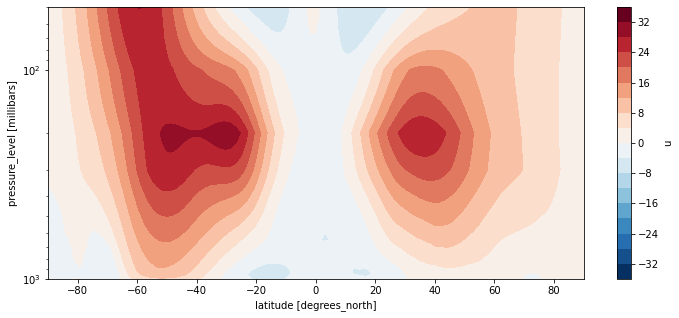

In [102]:
u_zonal = ds.u.mean(dim = ['longitude', 'month'])
u_zonal.plot.contourf(levels = 20)
plt.ylim([1000,50])
plt.yscale('log')

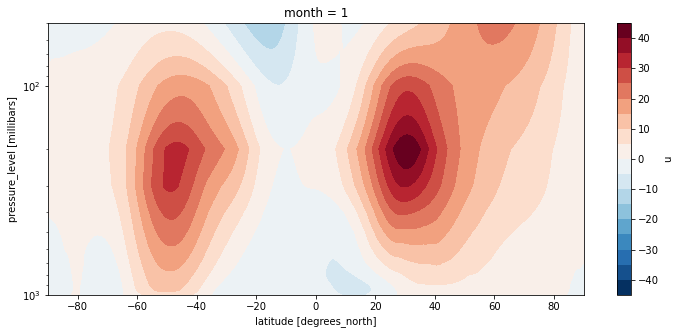

In [103]:
u_zonal = ds.u.mean(dim = ['longitude']).sel(month = 1)
u_zonal.plot.contourf(levels = 20)
plt.ylim([1000,50])
plt.yscale('log')

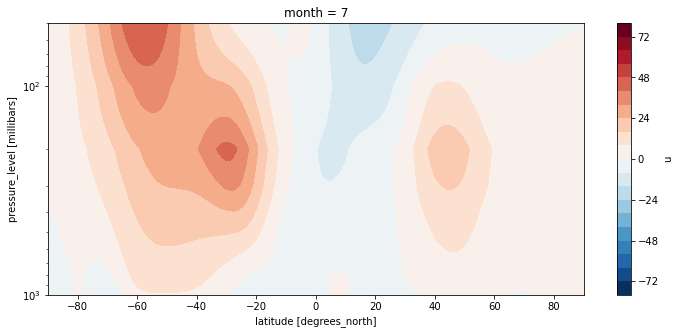

In [125]:
u_zonal = ds.u.mean(dim = ['longitude']).sel(month = 7)
u_zonal.plot.contourf(levels = 20)
plt.ylim([1000,50])
plt.yscale('log')

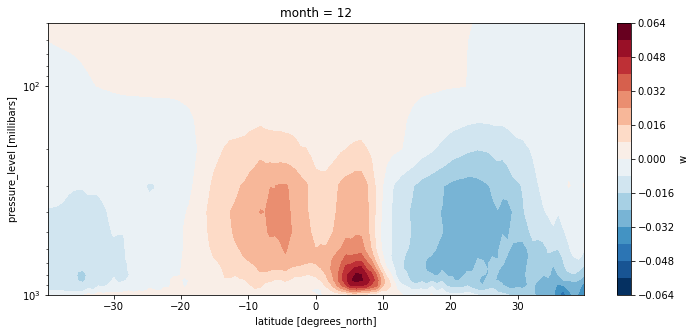

In [130]:
u_zonal = ds.w.mean(dim = ['longitude']).sel(month = 12).sel(latitude = slice(40,-40)) *(-1)
u_zonal.plot.contourf(levels = 20)
plt.ylim([1000,50])
plt.yscale('log')

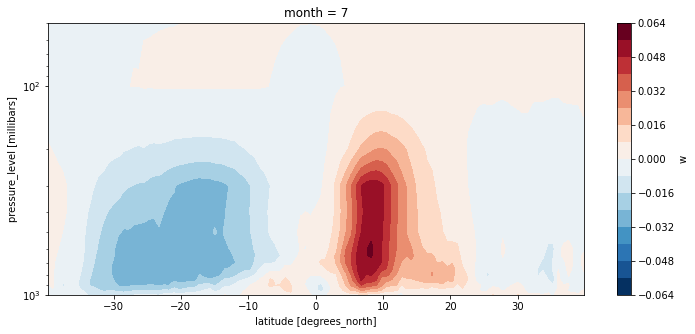

In [132]:
u_zonal = ds.w.mean(dim = ['longitude']).sel(month = 7).sel(latitude = slice(40,-40)) * (-1)
u_zonal.plot.contourf(levels = 20)
plt.ylim([1000,50])
plt.yscale('log')

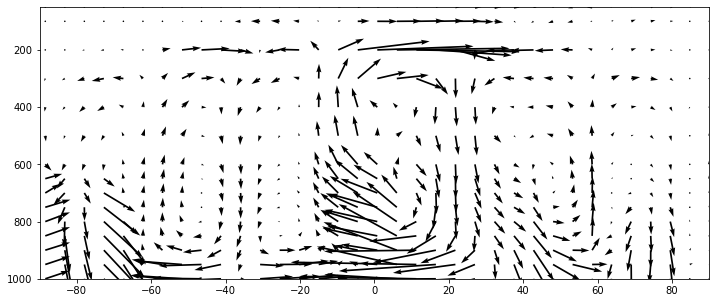

In [137]:
v = ds.v.mean(dim=['longitude']).sel(month=1)
w = - ds.w.mean(dim=['longitude']).sel(month=1)

pv, pw_m = v[:, ::7], w[:, ::7]*20
qv = plt.quiver(pv.latitude, pv.level, pv.values, pw_m.values)
plt.ylim([1000, 50]);
plt.xlim([-90, 90]);

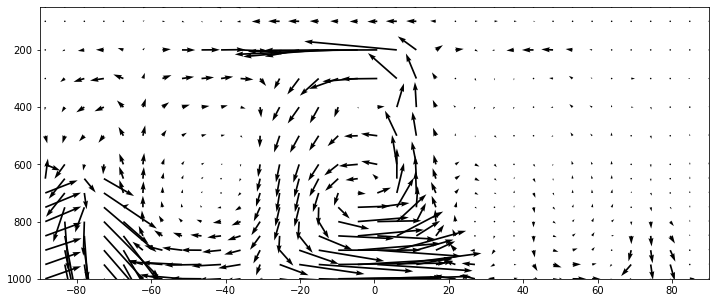

In [139]:
v = ds.v.mean(dim=['longitude']).sel(month=7)
w = - ds.w.mean(dim=['longitude']).sel(month=7)

pv, pw_m = v[:, ::7], w[:, ::7]*20
qv = plt.quiver(pv.latitude, pv.level, pv.values, pw_m.values)
plt.ylim([1000, 50]);
plt.xlim([-90, 90]);

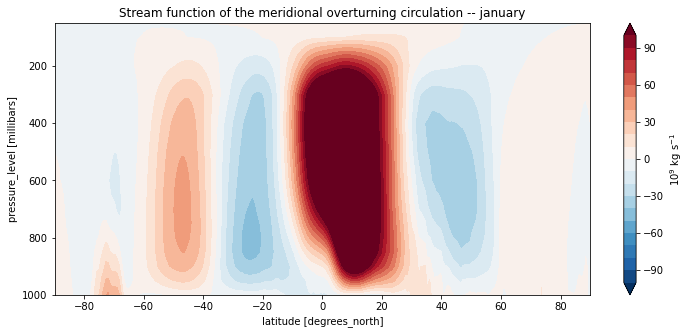

In [107]:
from scipy.integrate import cumtrapz
v = ds.v.mean(dim=[ 'longitude']).sel(month = 1)
zcoords = v.level * 100  # note the "* 100" to convert hPa into SI units!
integral = cumtrapz(v, zcoords, axis=0, initial=0)  # are we clear on what this function does?
psi = v * 0 + integral  # store the data in a new xarray DataArray
fac = 2 * np.pi * 6371000 * np.cos(np.deg2rad(v.latitude)) / 9.81
psi = psi * fac
# Convert to Sverdrups:
psi = psi / 1e9
psi.plot.contourf(levels=np.linspace(-100, 100, 21), extend='both', cbar_kwargs={'label':'10$^9$ kg s$^{-1}$'})
plt.title('Stream function of the meridional overturning circulation -- january')
plt.ylim([1000, 50]);

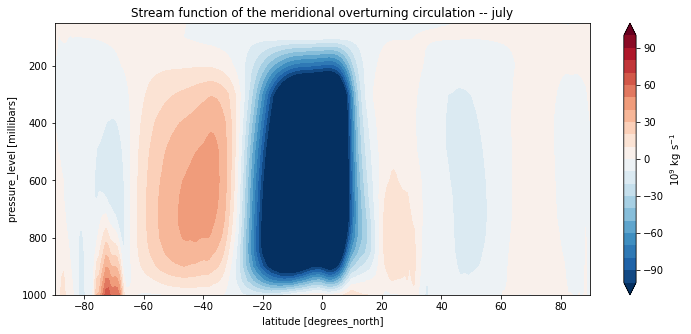

In [96]:
v = ds.v.mean(dim=[ 'longitude']).sel(month = 7)
zcoords = v.level * 100  # note the "* 100" to convert hPa into SI units!
integral = cumtrapz(v, zcoords, axis=0, initial=0)  # are we clear on what this function does?
psi = v * 0 + integral  # store the data in a new xarray DataArray
fac = 2 * np.pi * 6371000 * np.cos(np.deg2rad(v.latitude)) / 9.81
psi = psi * fac
# Convert to Sverdrups:
psi = psi / 1e9
psi.plot.contourf(levels=np.linspace(-100, 100, 21), extend='both', cbar_kwargs={'label':'10$^9$ kg s$^{-1}$'})
plt.title('Stream function of the meridional overturning circulation -- july')
plt.ylim([1000, 50]);

# CLoud cover

In [144]:
ds = xr.open_dataset('~/Python/Uni_climate/Lesson 2/ERA5_LowRes_Monthly_clouds.nc')
ds

<xarray.Dataset>
Dimensions:    (longitude: 480, latitude: 241, time: 480)
Coordinates:
  * longitude  (longitude) float32 -179.6 -178.9 -178.1 ... 178.1 178.9 179.6
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2018-12-01
Data variables:
    hcc        (time, latitude, longitude) float32 ...
    lcc        (time, latitude, longitude) float32 ...
    mcc        (time, latitude, longitude) float32 ...
    tcc        (time, latitude, longitude) float32 ...
    tciw       (time, latitude, longitude) float32 ...
    tclw       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2019-12-08 21:13:27 GMT by grib_to_netcdf-2.14.0: /opt/ecmw...

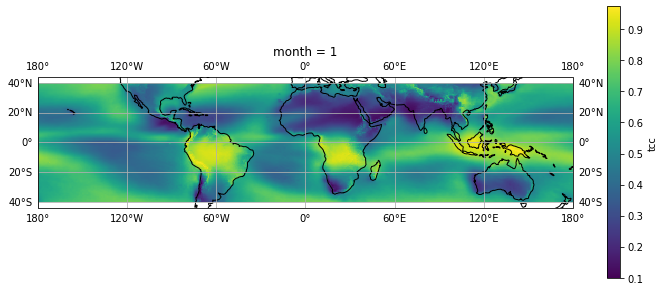

In [150]:
tot_cc = ds.tcc.groupby('time.month').mean(dim = 'time').sel(month = 1).sel(latitude = slice(40,-40))
ax = plt.axes(projection=ccrs.PlateCarree())
tot_cc.plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines(); ax.gridlines(draw_labels = True);

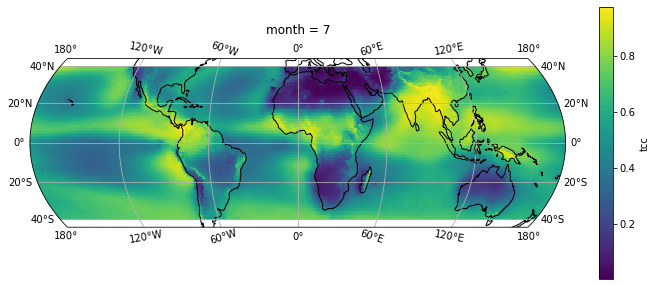

In [149]:
tot_cc = ds.tcc.groupby('time.month').mean(dim = 'time').sel(month = 7).sel(latitude = slice(40,-40))
ax = plt.axes(projection=ccrs.EqualEarth())
tot_cc.plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines(); ax.gridlines(draw_labels = True);

## Tropical climate control

position of Inte Tropical COnvergent Zone ITCZ (=area of low pressure, point of convergence of trade winds)
--> Hadley cell
while ITCZ remains over equator: over land shift father N or S (until 45°)
heat retention and stability of temp within ocean ITCZ remains more anchored to 1 position over oceans
land temp vary over year (influenced by altitude and relief) -> greater ITCZ migration, climate variation over continents
offshore winds --> deep lows over land -> enormous seasonal rains

(http://thebritishgeographer.weebly.com/the-climate-of-tropical-regions.html)